In [20]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')

# PERCENTIS + QUARTIS
Um quantil é exatamente o mesmo, exceto que ao invés de medir quantidades em porcentagens elas são medidas em frações, isto é, a mediana é o quantil.

[1 2 3 4 5 6 7 8 9 10]

Qual o percentil 90% -> 9 "é o valor que ocupa na lista ordenada que está a cima de 90%"



In [21]:
df = pd.read_csv('dados/WorldBank/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3731360.csv', skiprows=4)
gdp_qnt = df['1960'].quantile(q=0.7)

print(gdp_qnt)

429.4240015605796


# MERGE

In [22]:
df_area_florestal = pd.read_csv('dados/WorldBank/API_AG.LND.FRST.ZS_DS2_en_csv_v2_3731376.csv', skiprows=3)
df_pib_per_capita = pd.read_csv('dados/WorldBank/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3731360.csv', skiprows=3)

# on = argumento que será o fator de semelhanca entre os dfs 
merge_df = pd.merge(left=df_area_florestal, right=df_pib_per_capita, on="Country Name", suffixes=["_floresta", "_ppc"])
merge_df

,Country Name,Country Code_floresta,Indicator Name_floresta,Indicator Code_floresta,1960_floresta,1961_floresta,1962_floresta,1963_floresta,1964_floresta,1965_floresta,...,2012_ppc,2013_ppc,2014_ppc,2015_ppc,2016_ppc,2017_ppc,2018_ppc,2019_ppc,2020_ppc,Unnamed: 65_ppc
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4346.637931,NaN
262,"Yemen, Rep.",YEM,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1446.536472,1607.152173,1674.002572,1601.830063,1152.720966,964.264811,758.145242,NaN,NaN,NaN
263,South Africa,ZAF,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8222.197279,7467.079185,6988.808739,6259.839681,5756.965741,6690.939847,7005.095413,6624.761865,5655.867654,NaN
264,Zambia,ZMB,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1763.069442,1878.346811,1762.427817,1338.290927,1280.806543,1535.196574,1516.368371,1305.001031,985.132436,NaN


# CORRELAÇÃO
 avalia se/quanto um ponto reflete sobre o outro, ou seja, se eles tem relação entre si

- quando a correlação = 1 significa que quando um sobe o outro sobe
 
- quando a correlação = -1 significa que quando um sobe o outro desce
  
- quando a correlação = 0 (ou próximo de 0) não apresentam relação

In [23]:
corr_df = merge_df[["2020_ppc", "2020_floresta"]]

corr_df.corr()


,2020_ppc,2020_floresta
2020_ppc,1.000000,0.001981
2020_floresta,0.001981,1.000000


# PROBABILIDADE
$P(A \cap B) = P(A) P(B)$ 
<br>
<br>
$
P(A|B) = \frac{P(A \cap B)}{P(B)}
$
<br>
<br>
$P(\overline{A} | B) + P(A | B) = 1$
<br>
<br>
$P(A|B) = \frac{Qtd-de-vezes-que-A-e-B-ocorrem}{Total-de-B}$
Como se que o espaço amostral virasse o total de B
<br>
<br>
Bayes: $P(A|B)P(B) = P(B|A)P(A) -ou- P(A|B) = \frac{P(B|A)P(A)}{P(B)}$ 

# ESPERANÇA
A média das probabilidades - ex (Quanto em média será algo tendo em vista as probabibilidades)

$E(X)=\sum_{n=1}^N P(x_n) x_n$

exemplo: esperança do custo = p_jantar_e_cinema * (custo_jantar + custo_cinema) + p_n_jantar_e_cinema * (custo_cinema)

# VARIANCIA
Modelo de dispersão da esperança, mesmo conceito do desvio padrão porém no caso é como se fossem em medidas diferentes

$\text{Var}(X) =  \sum_{n=1}^N P(x_n) ({x_n}-E(X))^2$
- É o quadrado do desvio padrão

exemplo: var = p_jantar_e_cinema * ((esp - (custo_jantar + custo_cinema)) ** 2) + p_n_jantar_e_cinema * ((esp - (custo_cinema)) ** 2)

Ao calcular o desvio padrão da var é possível saber o quão volatil o valor da minha esperaça é.

Por exemplo, se desvio padrão = 10 e esp = 30 -> significa que o meu valor pode variar até 30 + 10 ou até 30 - 10

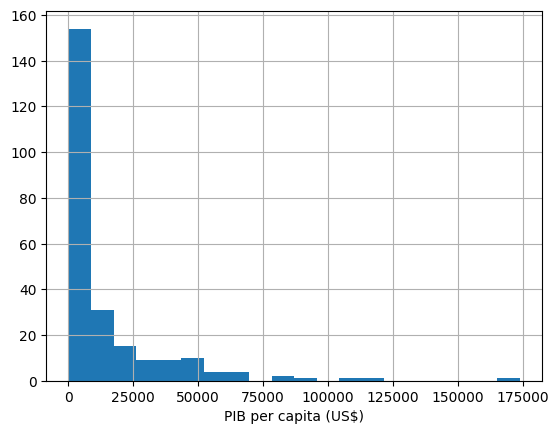

In [42]:
df = pd.read_csv('dados/WorldBank/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3731360.csv', skiprows=4)
df.head(-1)

plt.figure()
df["2020"].hist( bins=20)
plt.xlabel('PIB per capita (US$)')
plt.show()

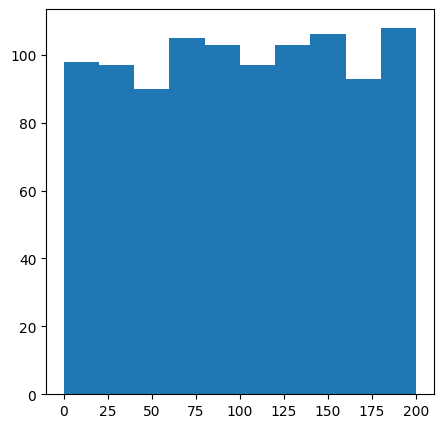

In [50]:
import random 

hist = []

for i in range(1000):
    hist.append(random.randint(0, 200))

plot_series = pd.Series(hist)

plot_series.plot.hist(figsize=(5, 5), alpha=1,)
plt.ylabel('')
plt.xlabel('')
plt.show()


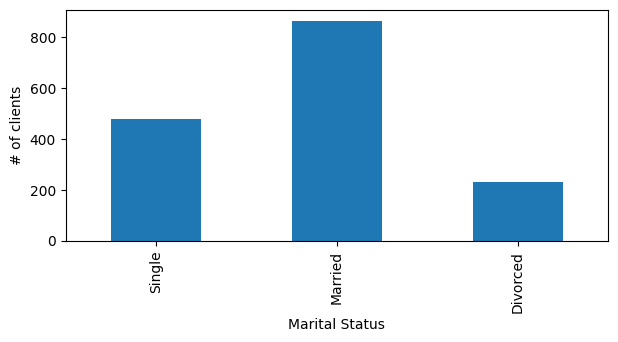

In [57]:
df = pd.read_csv('dados/iFood/ml_project1_data.csv')

plt_s = pd.Series({})
plt_s["Single"] = len(df[df["Marital_Status"] == "Single"])
plt_s["Married"] = len(df[df["Marital_Status"] == "Married"])
plt_s["Divorced"] = len(df[df["Marital_Status"] == "Divorced"])

plt_s.plot.bar(figsize=(7,3))
plt.ylabel('# of clients')
plt.xlabel('Marital Status')
plt.show()

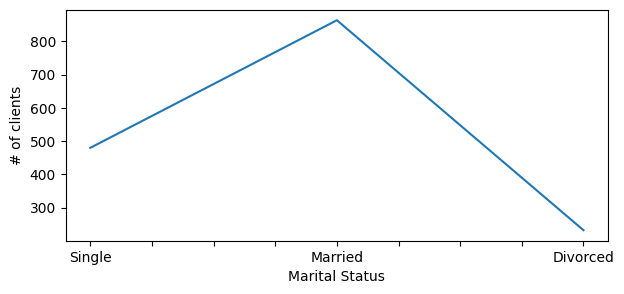

In [58]:
df = pd.read_csv('dados/iFood/ml_project1_data.csv')

plt_s = pd.Series({})
plt_s["Single"] = len(df[df["Marital_Status"] == "Single"])
plt_s["Married"] = len(df[df["Marital_Status"] == "Married"])
plt_s["Divorced"] = len(df[df["Marital_Status"] == "Divorced"])

plt_s.plot.line(figsize=(7,3))
plt.ylabel('# of clients')
plt.xlabel('Marital Status')
plt.show()

In [61]:
df = pd.read_csv('dados/iFood/ml_project1_data.csv')
_df = df.groupby("Marital_Status")["Income"].sum()

_df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Marital_Status,,,,,,,,,,,,,,,,,,,,,
Absurd,12103,3950,GraduationMaster,144731.0,0,0,2012-12-192014-01-10,106,711,169,...,3,0,0,1,1,0,0,6,22,1
Alone,8185,5919,MasterPhDGraduation,131367.0,3,2,2013-03-102014-05-192014-05-12,91,554,12,...,19,1,0,0,0,0,0,9,33,1
Divorced,1259078,456176,GraduationGraduationMasterMasterPhDPhDGraduati...,12257541.0,96,137,2012-11-132013-11-152013-11-152014-05-222012-1...,11481,75364,6363,...,1273,20,18,13,12,5,2,696,2552,48
Married,4867044,1701717,PhDPhDGraduationBasicGraduationGraduationMaste...,44328307.0,394,442,2014-01-192013-05-082013-11-152012-11-132012-1...,41712,258751,22235,...,4635,63,63,66,63,7,8,2592,9504,98
Single,2634836,946315,GraduationGraduationPhD2n CycleGraduationGradu...,24018810.0,223,195,2012-09-042014-03-082012-11-242012-11-032013-0...,23763,138399,12881,...,2536,38,33,31,31,5,6,1440,5280,106
